In [1]:
import foolbox as fb
import torch
import torchvision

In [2]:
torch.__version__, torch.cuda.is_available()

('1.12.0+cu102', True)

In [3]:
model = torchvision.models.resnet18(weights='ResNet18_Weights.IMAGENET1K_V1')
model = model.eval()

In [4]:
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3)
bounds = (0, 1)
fmodel = fb.PyTorchModel(model, bounds=bounds, preprocessing=preprocessing)

In [5]:
fmodel = fmodel.transform_bounds((0, 1))

In [6]:
images, labels = fb.utils.samples(fmodel, dataset='imagenet', batchsize=8)

In [7]:
fb.utils.accuracy(fmodel, images, labels)

0.875

In [8]:
type(images), images.shape

(torch.Tensor, torch.Size([8, 3, 224, 224]))

In [9]:
attack = fb.attacks.LinfDeepFoolAttack()

In [10]:
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=0.03)

In [11]:
is_adv

tensor([True, True, True, True, True, True, True, True], device='cuda:0')

In [12]:
labels

tensor([243, 559, 438, 990, 949, 853, 609, 609], device='cuda:0')

In [13]:
target_classes = (labels + 200) % 1000

In [14]:
target_classes

tensor([443, 759, 638, 190, 149,  53, 809, 809], device='cuda:0')

In [15]:
criterion = fb.criteria.TargetedMisclassification(target_classes)

In [39]:
attack = fb.attacks.L2CarliniWagnerAttack(steps=100)

In [44]:
advs, _, is_adv = attack(fmodel, images, criterion, epsilons=0.6)

In [45]:
is_adv

tensor([False, False,  True, False, False, False,  True, False],
       device='cuda:0')

In [46]:
fb.distances.l2(images, advs)

tensor([0.8982, 0.9787, 0.5469, 0.8635, 0.7121, 1.4742, 0.5181, 0.7975],
       device='cuda:0')

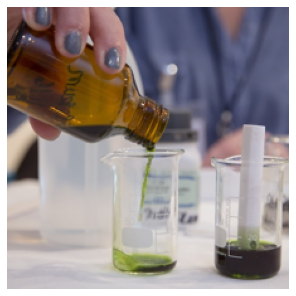

In [48]:
fb.plot.images(images[2:3],scale=4.)

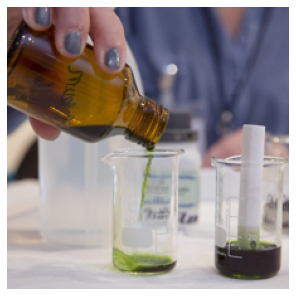

In [49]:
fb.plot.images(advs[2:3],scale=4.)

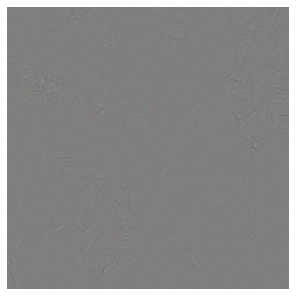

: 

In [52]:
fb.plot.images(advs[2:3] - images[2:3], n=1, bounds=(-0.1, 0.1), scale=4.)